In [10]:
import zipfile
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [11]:

def read_csv_from_zip(zip_path, csv_filename=None):
    """
    Read CSV directly from ZIP file without extracting
    """
    with zipfile.ZipFile(zip_path, 'r') as zip_file:
        # If no specific filename provided, find the first CSV
        if csv_filename is None:
            csv_files = [f for f in zip_file.namelist() if f.endswith('.csv')]
            if not csv_files:
                raise ValueError("No CSV files found in the ZIP")
            csv_filename = csv_files[0]
            print(f"Using CSV file: {csv_filename}")
        
        # Read CSV directly from ZIP
        with zip_file.open(csv_filename) as csv_file:
            df = pd.read_csv(csv_file)
    
    print(f"Successfully loaded CSV with {len(df)} rows and {len(df.columns)} columns")
    return df

# Usage examples
# Option 1: Auto-detect CSV file
df = read_csv_from_zip("Asg 4_big mac data.zip")

# Option 2: Specify CSV filename
#df = read_csv_from_zip("dataset.zip", "data.csv")

Using CSV file: big mac.csv
Successfully loaded CSV with 1386 rows and 19 columns


In [12]:
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,GBP_raw,JPY_raw,CNY_raw,GDP_dollar,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted
0,2000-04-01,ARG,ARS,Argentina,2.50,1.00,2.500000,-0.00398,0.05007,-0.16722,-0.09864,1.09091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-04-01,AUS,AUD,Australia,2.59,1.68,1.541667,-0.38579,-0.35246,-0.48645,-0.44416,0.28939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-04-01,BRA,BRL,Brazil,2.95,1.79,1.648045,-0.34341,-0.30778,-0.45102,-0.40581,0.37836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-04-01,CAN,CAD,Canada,2.85,1.47,1.938776,-0.22758,-0.18566,-0.35417,-0.30099,0.62152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-04-01,CHE,CHF,Switzerland,5.90,1.70,3.470588,0.38270,0.45774,0.15609,0.25130,1.90267,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DataFrame columns: ['date', 'iso_a3', 'currency_code', 'name', 'local_price', 'dollar_ex', 'dollar_price', 'USD_raw', 'EUR_raw', 'GBP_raw', 'JPY_raw', 'CNY_raw', 'GDP_dollar', 'adj_price', 'USD_adjusted', 'EUR_adjusted', 'GBP_adjusted', 'JPY_adjusted', 'CNY_adjusted']

First few rows:
         date iso_a3 currency_code         name  local_price  dollar_ex  \
0  2000-04-01    ARG           ARS    Argentina         2.50       1.00   
1  2000-04-01    AUS           AUD    Australia         2.59       1.68   
2  2000-04-01    BRA           BRL       Brazil         2.95       1.79   
3  2000-04-01    CAN           CAD       Canada         2.85       1.47   
4  2000-04-01    CHE           CHF  Switzerland         5.90       1.70   

   dollar_price  USD_raw  EUR_raw  GBP_raw  JPY_raw  CNY_raw  GDP_dollar  \
0      2.500000 -0.00398  0.05007 -0.16722 -0.09864  1.09091         NaN   
1      1.541667 -0.38579 -0.35246 -0.48645 -0.44416  0.28939         NaN   
2      1.648045 -0.34341 -0.30778 -

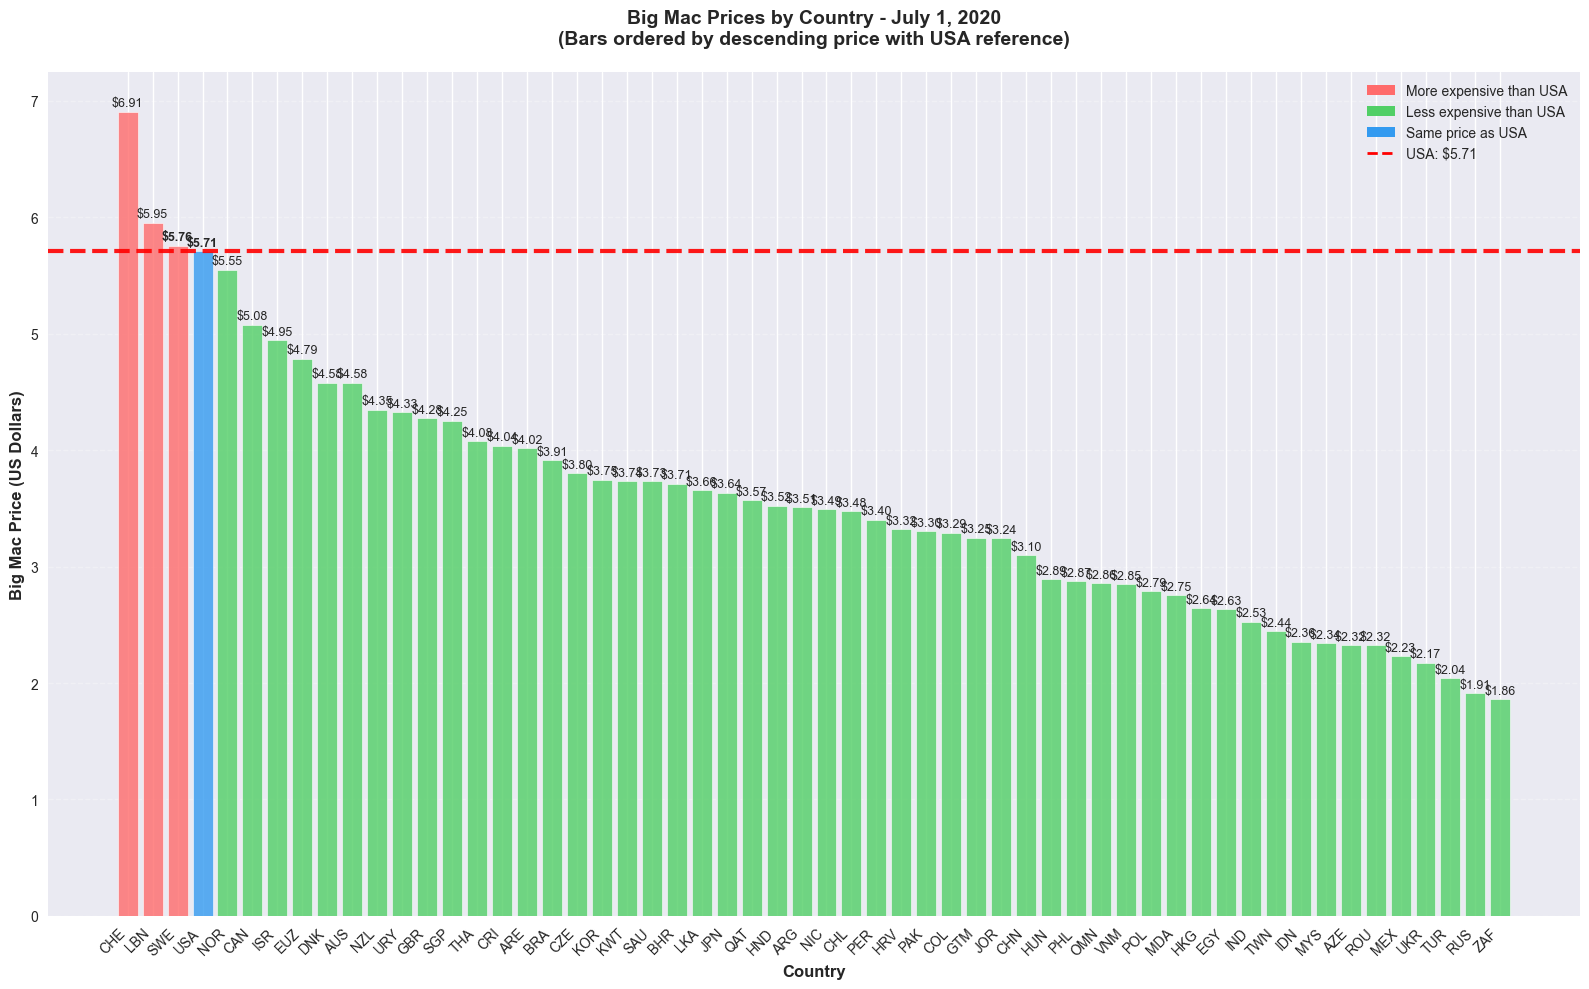


📊 COMPREHENSIVE ANALYSIS - July 1, 2020
USA Big Mac price: $5.71
Highest price: $6.91 (Switzerland)
Lowest price: $1.86 (South Africa)
Average price: $3.58
Median price: $3.50
Price range: $5.05

📈 PRICE COMPARISON WITH USA:
More expensive than USA: 3 countries
  Most expensive: Switzerland ($6.91)
  Average premium: +$0.49
Less expensive than USA: 52 countries
  Least expensive: South Africa ($1.86)
  Average discount: -$2.32
Same price as USA: 1 countries

🏆 TOP 5 MOST EXPENSIVE:
  1. Switzerland: $6.91 (+20.9%)
  2. Lebanon: $5.95 (+4.2%)
  3. Sweden: $5.76 (+0.8%)
  4. United States: $5.71 (+0.0%)
  5. Norway: $5.55 (-2.8%)

💸 TOP 5 LEAST EXPENSIVE:
  1. South Africa: $1.86 (-67.4%)
  2. Russia: $1.91 (-66.5%)
  3. Turkey: $2.04 (-64.3%)
  4. Ukraine: $2.17 (-61.9%)
  5. Mexico: $2.23 (-61.0%)


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Check the dataframe structure
print("DataFrame columns:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

# Let's check what the country code column is called and its values
country_code_col = None
possible_country_code_names = ['country_code', 'countrycode', 'code', 'Code', 'country', 'Country Code']
for col in possible_country_code_names:
    if col in df.columns:
        country_code_col = col
        break

if country_code_col:
    print(f"\nUsing country code column: '{country_code_col}'")
    print("Sample country codes:", df[country_code_col].unique()[:10])
else:
    print("\nNo country code column found. Available columns:", df.columns.tolist())
    # If no country code column found, we'll use the 'name' column as before

# STEP 1: Filter for July 1, 2020 (if date column exists)
date_columns = ['date', 'Date', 'DATE', 'datetime']
date_col = None
for col in date_columns:
    if col in df.columns:
        date_col = col
        break

if date_col:
    # Convert to datetime and filter for July 1, 2020
    df[date_col] = pd.to_datetime(df[date_col])
    df_july_2020 = df[df[date_col] == '2020-07-01'].copy()
    print(f"\nFiltered data for July 1, 2020: {len(df_july_2020)} rows")
else:
    # Assume all data is for July 1, 2020
    df_july_2020 = df.copy()
    print("\nNo date column found. Using entire dataset as July 1, 2020 data")

# STEP 2: Sort by dollar_price in descending order
df_sorted = df_july_2020.sort_values('dollar_price', ascending=False)

print(f"\nTotal countries in analysis: {len(df_sorted)}")

# STEP 3: Find USA price using country code
usa_price = None
usa_country_identifier = None

# Try to find USA using country code first
if country_code_col:
    # Common USA country codes
    usa_codes = ['USA', 'US', 'USA', 'US', '840']  # 840 is ISO numeric code for USA
    
    for code in usa_codes:
        if code in df_sorted[country_code_col].values:
            usa_price = df_sorted[df_sorted[country_code_col] == code]['dollar_price'].values[0]
            usa_country_identifier = f"USA (code: {code})"
            print(f"Found USA using country code: ${usa_price:.2f}")
            break

# If not found by code, try by name
if usa_price is None:
    usa_names = ['USA', 'United States', 'US', 'U.S.A.', 'U.S.']
    
    for name in usa_names:
        if name in df_sorted['name'].values:
            usa_price = df_sorted[df_sorted['name'] == name]['dollar_price'].values[0]
            usa_country_identifier = f"USA (name: {name})"
            print(f"Found USA using name: ${usa_price:.2f}")
            break

# If still not found, use median
if usa_price is None:
    usa_price = df_sorted['dollar_price'].median()
    usa_country_identifier = "USA (median - not found in data)"
    print(f"USA not found. Using median price: ${usa_price:.2f}")

# STEP 4: Create the visualization
fig, ax = plt.subplots(figsize=(16, 10))

# Create bars with different colors for countries more/less expensive than USA
colors = []
for price in df_sorted['dollar_price']:
    if price > usa_price:
        colors.append('#ff6b6b')  # Red for more expensive
    elif price < usa_price:
        colors.append('#51cf66')   # Green for less expensive
    else:
        colors.append('#339af0')   # Blue for same price

bars = ax.bar(df_sorted['iso_a3'], df_sorted['dollar_price'], 
              color=colors, edgecolor='white', alpha=0.8, linewidth=0.5)

# Draw horizontal reference line for USA
ax.axhline(y=usa_price, color='red', linestyle='--', linewidth=3, 
           label=f'{usa_country_identifier}: ${usa_price:.2f}', alpha=0.9)

# Customize the chart
ax.set_xlabel('Country', fontsize=12, fontweight='bold')
ax.set_ylabel('Big Mac Price (US Dollars)', fontsize=12, fontweight='bold')
ax.set_title('Big Mac Prices by Country - July 1, 2020\n(Bars ordered by descending price with USA reference)', 
             fontsize=14, fontweight='bold', pad=20)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'${height:.2f}', ha='center', va='bottom', fontsize=9,
            fontweight='bold' if abs(height - usa_price) < 0.1 else 'normal')

# Add grid for better readability
ax.grid(True, axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Add legend with custom colors
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#ff6b6b', label='More expensive than USA'),
    Patch(facecolor='#51cf66', label='Less expensive than USA'), 
    Patch(facecolor='#339af0', label='Same price as USA'),
    plt.Line2D([0], [0], color='red', linestyle='--', linewidth=2, label=f'USA: ${usa_price:.2f}')
]
ax.legend(handles=legend_elements, loc='upper right')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print comprehensive summary
print(f"\n📊 COMPREHENSIVE ANALYSIS - July 1, 2020")
print("="*60)
print(f"USA Big Mac price: ${usa_price:.2f}")
print(f"Highest price: ${df_sorted['dollar_price'].max():.2f} ({df_sorted.iloc[0]['name']})")
print(f"Lowest price: ${df_sorted['dollar_price'].min():.2f} ({df_sorted.iloc[-1]['name']})")
print(f"Average price: ${df_sorted['dollar_price'].mean():.2f}")
print(f"Median price: ${df_sorted['dollar_price'].median():.2f}")
print(f"Price range: ${df_sorted['dollar_price'].max() - df_sorted['dollar_price'].min():.2f}")

# Detailed price comparison analysis
more_expensive = df_sorted[df_sorted['dollar_price'] > usa_price]
less_expensive = df_sorted[df_sorted['dollar_price'] < usa_price]
same_price = df_sorted[df_sorted['dollar_price'] == usa_price]

print(f"\n📈 PRICE COMPARISON WITH USA:")
print(f"More expensive than USA: {len(more_expensive)} countries")
if len(more_expensive) > 0:
    print(f"  Most expensive: {more_expensive.iloc[0]['name']} (${more_expensive.iloc[0]['dollar_price']:.2f})")
    print(f"  Average premium: +${(more_expensive['dollar_price'].mean() - usa_price):.2f}")

print(f"Less expensive than USA: {len(less_expensive)} countries")
if len(less_expensive) > 0:
    print(f"  Least expensive: {less_expensive.iloc[-1]['name']} (${less_expensive.iloc[-1]['dollar_price']:.2f})")
    print(f"  Average discount: -${(usa_price - less_expensive['dollar_price'].mean()):.2f}")

print(f"Same price as USA: {len(same_price)} countries")

# Show top 5 most expensive countries
print(f"\n🏆 TOP 5 MOST EXPENSIVE:")
for i in range(min(5, len(df_sorted))):
    country = df_sorted.iloc[i]
    diff = country['dollar_price'] - usa_price
    diff_pct = (diff / usa_price) * 100
    print(f"  {i+1}. {country['name']}: ${country['dollar_price']:.2f} ({diff_pct:+.1f}%)")

# Show bottom 5 least expensive countries  
print(f"\n💸 TOP 5 LEAST EXPENSIVE:")
for i in range(1, min(6, len(df_sorted))):
    country = df_sorted.iloc[-i]
    diff = country['dollar_price'] - usa_price
    diff_pct = (diff / usa_price) * 100
    print(f"  {i}. {country['name']}: ${country['dollar_price']:.2f} ({diff_pct:+.1f}%)")

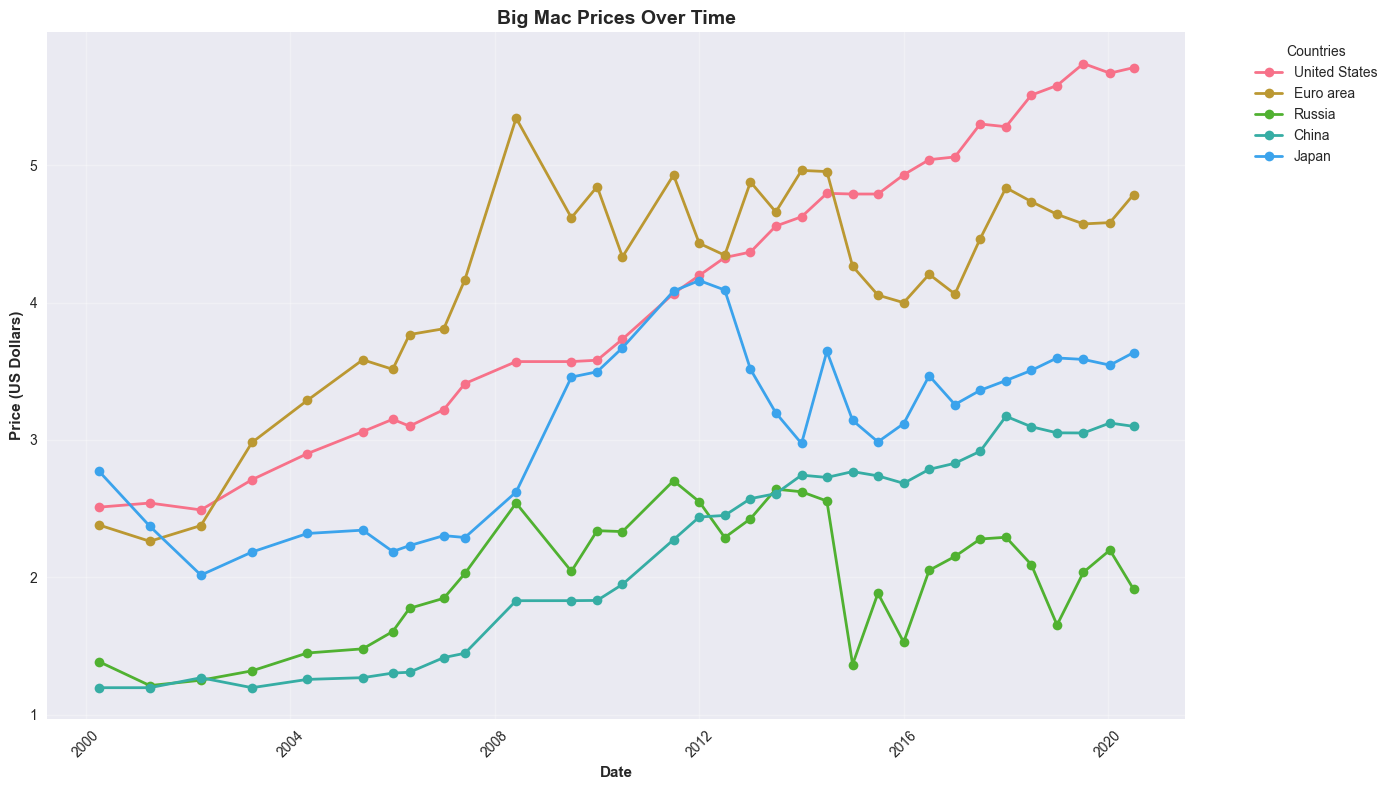

In [14]:

# Simple and clean time series plot
def simple_time_series_plot(df, countries, date_col='date'):
    """
    Simple time series plot for the 5 specified countries
    """
    # Filter data
    df_countries = df[df['name'].isin(countries)].copy()
    
    # Pivot to have countries as columns
    pivot_df = df_countries.pivot_table(
        index=date_col, 
        columns='name', 
        values='dollar_price'
    ).reset_index()
    
    # Create plot
    plt.figure(figsize=(14, 8))
    
    # Plot each country
    for country in countries:
        if country in pivot_df.columns:
            plt.plot(pivot_df[date_col], pivot_df[country], 
                    marker='o', linewidth=2, label=country)
    
    # Customize
    plt.title('Big Mac Prices Over Time', fontsize=14, fontweight='bold')
    plt.xlabel('Date', fontweight='bold')
    plt.ylabel('Price (US Dollars)', fontweight='bold')
    plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    return plt.gcf()

# Create simple plot
fig = simple_time_series_plot(df, ['United States','Euro area', 'Russia', 'China', 'Japan'])
plt.show()

---
## Q3

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.integrate import simpson

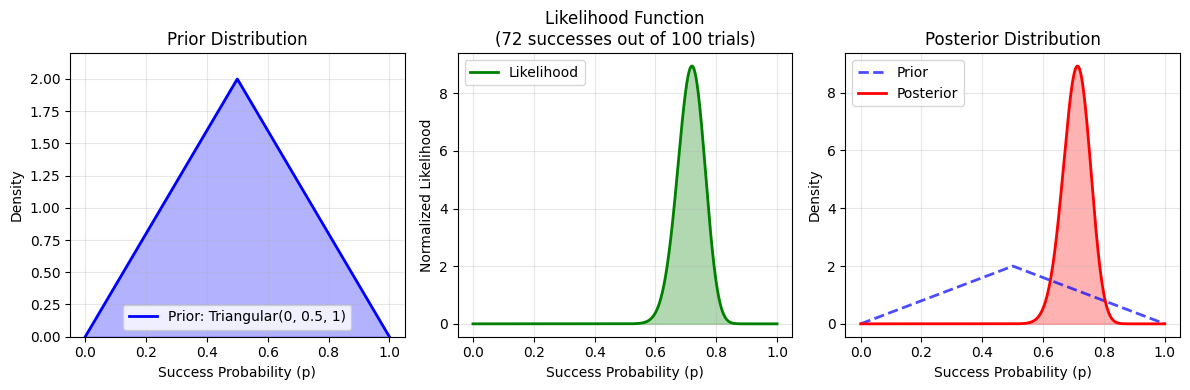

Bayesian Analysis Results:
Prior: Triangular(a=0, c=0.5, b=1)
Data: 72 successes out of 100 trials

Posterior Statistics:
Mean: 0.7087
Mode: 0.7127
95% Credible Interval: (0.6176, 0.7918)


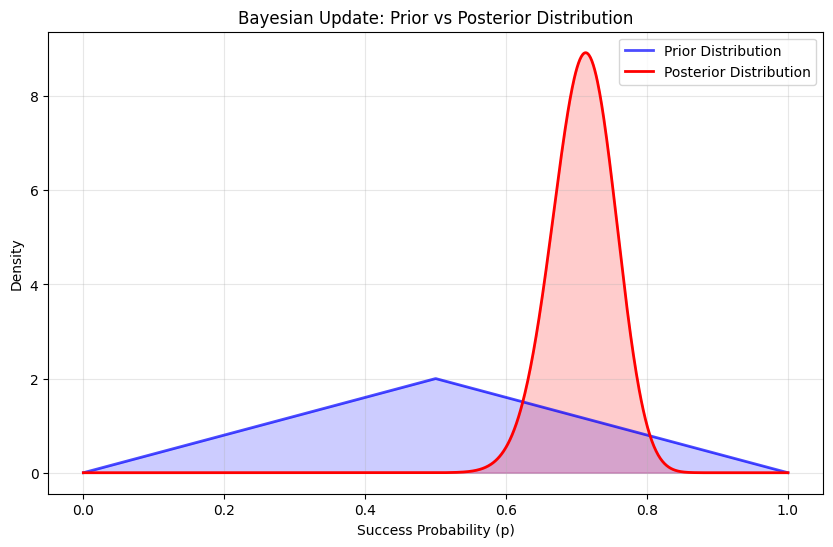

In [16]:
# Set up the plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = [10, 6]

# 1. Define and Plot the Prior Distribution (Triangular)
def triangular_pdf(x, a, b, c):
    """Triangular distribution PDF"""
    return np.where(x < c, 
                   2 * (x - a) / ((b - a) * (c - a)),
                   2 * (b - x) / ((b - a) * (b - c)))

# Parameters for triangular prior
a, b, c = 0, 1, 0.5
p_values = np.linspace(0, 1, 1000)
prior_pdf = triangular_pdf(p_values, a, b, c)

# Plot prior distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(p_values, prior_pdf, 'b-', linewidth=2, label='Prior: Triangular(0, 0.5, 1)')
plt.fill_between(p_values, prior_pdf, alpha=0.3, color='blue')
plt.xlabel('Success Probability (p)')
plt.ylabel('Density')
plt.title('Prior Distribution')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 2.2)

# 2. Compute and Plot the Likelihood Function
def binomial_likelihood(p, successes, trials):
    """Binomial likelihood function"""
    return stats.binom.pmf(successes, trials, p)

# Data: 72 successes out of 100 trials
successes = 72
trials = 100

# Calculate likelihood
likelihood = binomial_likelihood(p_values, successes, trials)

# Normalize likelihood for better visualization (not for Bayesian updating)
likelihood_normalized = likelihood / simpson(likelihood, p_values)

# Plot likelihood
plt.subplot(1, 3, 2)
plt.plot(p_values, likelihood_normalized, 'g-', linewidth=2, label='Likelihood')
plt.fill_between(p_values, likelihood_normalized, alpha=0.3, color='green')
plt.xlabel('Success Probability (p)')
plt.ylabel('Normalized Likelihood')
plt.title(f'Likelihood Function\n(72 successes out of 100 trials)')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Compute and Plot the Posterior Distribution
# Bayes' Theorem: Posterior ∝ Prior × Likelihood
unnormalized_posterior = prior_pdf * likelihood

# Normalize the posterior
posterior = unnormalized_posterior / simpson(unnormalized_posterior, p_values)

# Plot posterior compared to prior
plt.subplot(1, 3, 3)
plt.plot(p_values, prior_pdf, 'b--', linewidth=2, alpha=0.7, label='Prior')
plt.plot(p_values, posterior, 'r-', linewidth=2, label='Posterior')
plt.fill_between(p_values, posterior, alpha=0.3, color='red')
plt.xlabel('Success Probability (p)')
plt.ylabel('Density')
plt.title('Posterior Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate some key statistics
posterior_mean = simpson(p_values * posterior, p_values)
posterior_mode = p_values[np.argmax(posterior)]

# Calculate 95% credible interval using cumulative integration
cdf = np.cumsum(posterior) * (p_values[1] - p_values[0])  # Approximate CDF
cdf = cdf / cdf[-1]  # Normalize CDF
lower_idx = np.argmax(cdf >= 0.025)
upper_idx = np.argmax(cdf >= 0.975)
credible_interval = (p_values[lower_idx], p_values[upper_idx])

print("Bayesian Analysis Results:")
print(f"Prior: Triangular(a=0, c=0.5, b=1)")
print(f"Data: {successes} successes out of {trials} trials")
print(f"\nPosterior Statistics:")
print(f"Mean: {posterior_mean:.4f}")
print(f"Mode: {posterior_mode:.4f}")
print(f"95% Credible Interval: ({credible_interval[0]:.4f}, {credible_interval[1]:.4f})")

# Additional visualization: Prior vs Posterior comparison
plt.figure(figsize=(10, 6))
plt.plot(p_values, prior_pdf, 'b-', linewidth=2, label='Prior Distribution', alpha=0.7)
plt.plot(p_values, posterior, 'r-', linewidth=2, label='Posterior Distribution')
plt.fill_between(p_values, prior_pdf, alpha=0.2, color='blue')
plt.fill_between(p_values, posterior, alpha=0.2, color='red')
plt.xlabel('Success Probability (p)')
plt.ylabel('Density')
plt.title('Bayesian Update: Prior vs Posterior Distribution')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Part D

=== POSTERIOR ANALYSIS ===
P(success rate > 0.5) = 1.0000
Probability that treatment is better than random chance: 100.00%
95% Credible Interval: (0.6186, 0.7928)
90% Credible Interval: (0.6336, 0.7798)
50% Credible Interval: (0.6797, 0.7397)


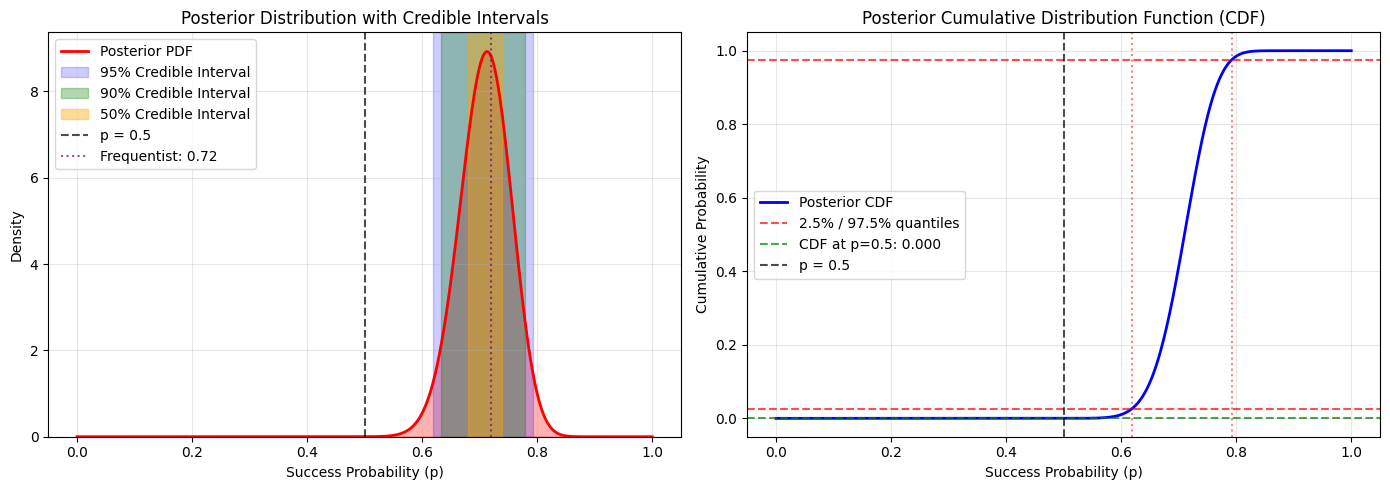


=== DETAILED ANALYSIS ===
Posterior Mean: 0.7087
MAP Estimate: 0.7127
Frequentist Estimate: 0.7200

Probability that success rate exceeds thresholds:
P(p > 0.5) = 1.0000
P(p > 0.6) = 0.9901
P(p > 0.7) = 0.5911
P(p > 0.8) = 0.0152

Conclusion: With P(p > 0.5) = 1.0000, there is strong evidence
that the treatment success rate is better than random chance.


C:\Users\Nova\AppData\Local\Temp\ipykernel_10116\2262905763.py:170: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  posterior_mean = np.trapz(p_values * posterior, p_values)


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.integrate import simpson, cumulative_trapezoid

# Alternative: if simpson is not available, we can use numpy.trapz
try:
    from scipy.integrate import simpson
    integration_method = simpson
except ImportError:
    from scipy.integrate import trapz
    integration_method = trapz

# Set up the plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = [10, 6]

# 1. Define the Prior Distribution (Triangular)
def triangular_prior(p, a=0, c=0.5, b=1):
    """
    Triangular prior distribution for success probability p
    Parameters: a=lower bound, c=mode, b=upper bound
    """
    condition1 = (a <= p) & (p <= c)
    condition2 = (c < p) & (p <= b)
    
    prior = np.zeros_like(p)
    prior[condition1] = (2 * (p[condition1] - a)) / ((b - a) * (c - a))
    prior[condition2] = (2 * (b - p[condition2])) / ((b - a) * (b - c))
    
    return prior

# 2. Binomial Likelihood Function
def binomial_likelihood(p, successes, trials):
    """
    Binomial likelihood function (ignoring constant term)
    """
    return p**successes * (1-p)**(trials-successes)

# 3. Compute Posterior Distribution
def compute_posterior(prior, likelihood, p_values):
    """
    Compute posterior distribution using Bayes' theorem
    """
    # Multiply prior by likelihood
    unnormalized_posterior = prior * likelihood
    
    # Normalize the posterior using available integration method
    normalization_constant = integration_method(unnormalized_posterior, p_values)
    posterior = unnormalized_posterior / normalization_constant
    
    return posterior

# Parameters and data
p_values = np.linspace(0, 1, 1000)
successes = 72
trials = 100

# Calculate distributions
prior = triangular_prior(p_values)
likelihood = binomial_likelihood(p_values, successes, trials)
posterior = compute_posterior(prior, likelihood, p_values)

# d) Analyze the Posterior

# (i) Calculate and plot the CDF of the posterior
try:
    # Use cumulative_trapezoid if available
    posterior_cdf = cumulative_trapezoid(posterior, p_values, initial=0)
except:
    # Fallback: manually compute cumulative integral
    posterior_cdf = np.zeros_like(p_values)
    for i in range(1, len(p_values)):
        posterior_cdf[i] = np.trapz(posterior[:i+1], p_values[:i+1])
    posterior_cdf = posterior_cdf / posterior_cdf[-1]

# Normalize CDF to ensure it goes exactly to 1
posterior_cdf = posterior_cdf / posterior_cdf[-1]

# Find P(p > 0.5)
p_threshold = 0.5
idx_05 = np.argmin(np.abs(p_values - p_threshold))
p_greater_than_05 = 1 - posterior_cdf[idx_05]

print("=== POSTERIOR ANALYSIS ===")
print(f"P(success rate > 0.5) = {p_greater_than_05:.4f}")
print(f"Probability that treatment is better than random chance: {p_greater_than_05*100:.2f}%")

# (ii) Calculate 95% credible interval
def find_credible_interval(p_values, posterior, confidence=0.95):
    """
    Find credible interval for given confidence level
    """
    # Calculate CDF
    try:
        cdf = cumulative_trapezoid(posterior, p_values, initial=0)
    except:
        cdf = np.zeros_like(p_values)
        for i in range(1, len(p_values)):
            cdf[i] = np.trapz(posterior[:i+1], p_values[:i+1])
    
    cdf = cdf / cdf[-1]  # Normalize
    
    alpha = (1 - confidence) / 2
    lower_bound = p_values[np.argmax(cdf >= alpha)]
    upper_bound = p_values[np.argmax(cdf >= 1 - alpha)]
    
    return lower_bound, upper_bound

# Calculate credible intervals
lower_95, upper_95 = find_credible_interval(p_values, posterior, 0.95)
lower_90, upper_90 = find_credible_interval(p_values, posterior, 0.90)
lower_50, upper_50 = find_credible_interval(p_values, posterior, 0.50)

print(f"95% Credible Interval: ({lower_95:.4f}, {upper_95:.4f})")
print(f"90% Credible Interval: ({lower_90:.4f}, {upper_90:.4f})")
print(f"50% Credible Interval: ({lower_50:.4f}, {upper_50:.4f})")

# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: PDF with credible intervals
ax1.plot(p_values, posterior, 'r-', linewidth=2, label='Posterior PDF')
ax1.fill_between(p_values, posterior, alpha=0.3, color='red')

# Mark credible intervals
ax1.axvspan(lower_95, upper_95, alpha=0.2, color='blue', label='95% Credible Interval')
ax1.axvspan(lower_90, upper_90, alpha=0.3, color='green', label='90% Credible Interval')
ax1.axvspan(lower_50, upper_50, alpha=0.4, color='orange', label='50% Credible Interval')

# Mark key values
ax1.axvline(x=0.5, color='black', linestyle='--', alpha=0.7, label='p = 0.5')
ax1.axvline(x=successes/trials, color='purple', linestyle=':', alpha=0.7, 
           label=f'Frequentist: {successes/trials:.2f}')

ax1.set_xlabel('Success Probability (p)')
ax1.set_ylabel('Density')
ax1.set_title('Posterior Distribution with Credible Intervals')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_ylim(bottom=0)

# Plot 2: CDF
ax2.plot(p_values, posterior_cdf, 'b-', linewidth=2, label='Posterior CDF')

# Mark key points on CDF
ax2.axhline(y=0.025, color='red', linestyle='--', alpha=0.7, label='2.5% / 97.5% quantiles')
ax2.axhline(y=0.975, color='red', linestyle='--', alpha=0.7)
ax2.axhline(y=posterior_cdf[idx_05], color='green', linestyle='--', alpha=0.7, 
           label=f'CDF at p=0.5: {posterior_cdf[idx_05]:.3f}')

# Mark the 95% credible interval boundaries
ax2.axvline(x=lower_95, color='red', linestyle=':', alpha=0.5)
ax2.axvline(x=upper_95, color='red', linestyle=':', alpha=0.5)
ax2.axvline(x=0.5, color='black', linestyle='--', alpha=0.7, label='p = 0.5')

ax2.set_xlabel('Success Probability (p)')
ax2.set_ylabel('Cumulative Probability')
ax2.set_title('Posterior Cumulative Distribution Function (CDF)')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# Additional analysis
print("\n=== DETAILED ANALYSIS ===")

# Calculate posterior statistics
posterior_mean = np.trapz(p_values * posterior, p_values)
map_estimate = p_values[np.argmax(posterior)]

print(f"Posterior Mean: {posterior_mean:.4f}")
print(f"MAP Estimate: {map_estimate:.4f}")
print(f"Frequentist Estimate: {successes/trials:.4f}")

# Calculate probabilities for different thresholds
print("\nProbability that success rate exceeds thresholds:")
thresholds = [0.5, 0.6, 0.7, 0.8]
for threshold in thresholds:
    idx = np.argmin(np.abs(p_values - threshold))
    prob = 1 - posterior_cdf[idx]
    print(f"P(p > {threshold}) = {prob:.4f}")

print(f"\nConclusion: With P(p > 0.5) = {p_greater_than_05:.4f}, there is strong evidence")
print(f"that the treatment success rate is better than random chance.")